In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

models['Ans'].hr_effects_enabled = True
models['Ans'].mv_effects_enabled: bool = True
models['Ans'].venpool_effects_enabled: bool = False
models['Ans'].cont_effects_enabled: bool = False
models['Ans'].svr_effects_enabled: bool = False
models['Ans'].pvr_effects_enabled: bool = False

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

-0.003999999999999999
-1.4142857142857144
 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.3 sec. Average model step in 0.0274 ms.


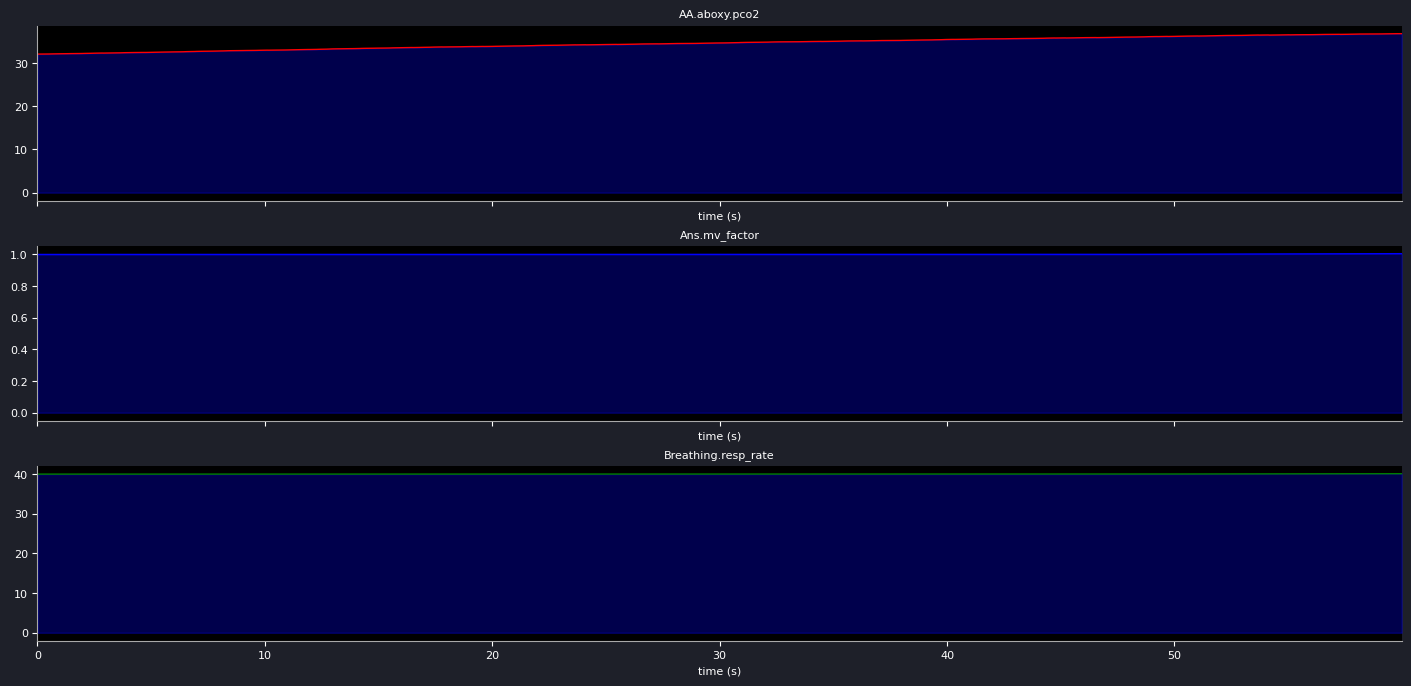


AA.aboxy.pco2   : max   36.82505 min   32.08033
Ans.mv_factor   : max    1.00499 min        1.0
Breathing.resp_rate: max   40.09973 min       40.0


In [2]:
#models["Fluids"].add_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.aboxy.pco2","Ans.mv_factor", "Breathing.resp_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [3]:
neo.fastforward(120)
neo.get_vitals()

 Ready in 6.1 sec. Average model step in 0.0253 ms.

AA.pres         : max   70.81835, min   45.37842 mmHg
PA.pres         : max   41.81818, min   18.13451 mmHg
IVCI.pres       : max    2.78333, min    1.52974 mmHg


{'heartrate': 136.31260431039283,
 'spo2_pre': 97.77616160581397,
 'spo2_post': 97.49837715856572,
 'abp_systole': 70.81835,
 'abp_diastole': 45.37842,
 'pap_systole': 41.81818,
 'pap_diastole': 18.13451,
 'cvp': 1.947561547,
 'resp_rate': 40.63587763491752,
 'pH': 7.4072992756364435,
 'po2': 96.6369513119009,
 'pco2': 41.671871258807975,
 'hco3': 25.933196721619172,
 'be': 0.8353455776359554}

All off -> 75 ml loss -> 36/21      hr 140
Only HR -> 75 ml loss -> 35.8/24.2  hr 190